In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from init_objects import *
from functions.stylizedfacts import *
from functions.helpers import organise_data
from distribution_model import *
import statsmodels.api as sm
from matplotlib import style
from collections import OrderedDict
import seaborn as sns
import scipy.stats as stats
import scipy

In [2]:
style.use('ggplot')

# Run distribution model

In [3]:
NRUNS = 1

In [12]:
params = {"fundamental_value": 166,
          "trader_sample_size": 15, "n_traders": 5000,
          "ticks": 1200, "std_fundamental": 0.0530163128919286,
          "std_noise": 0.106,
          "w_fundamentalists": 80.5, "w_momentum": 0.01,
          "init_stocks": 10, "base_risk_aversion": 0.05,
          "w_random": 0.02, "horizon": 200}

In [13]:
traders = []
obs = []
for seed in range(NRUNS): 
    traders, orderbook = init_objects_distr(params, seed)
    traders, orderbook = distr_model(traders, orderbook, params, seed)
    traders.append(traders)
    obs.append(orderbook)

# Analyse dynamics

In [14]:
mc_prices, mc_returns, mc_autocorr_returns, mc_autocorr_abs_returns, mc_volatility, mc_volume, mc_fundamentals = organise_data(obs)

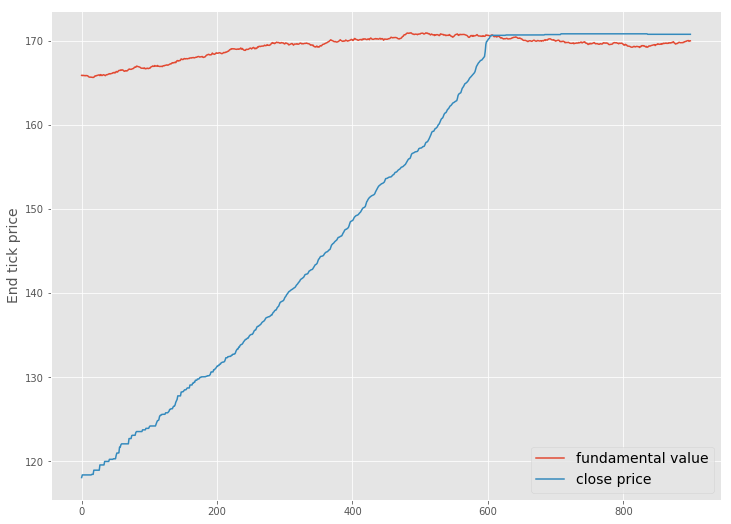

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,9))

ax1.plot(mc_fundamentals.index, mc_fundamentals[0], label='fundamental value')
ax1.plot(mc_prices.index, mc_prices[0], label='close price')

ax1.set_ylabel('End tick price', fontsize='14')
ax1.legend(loc='best', fontsize='14')

#fig.savefig('behavioural_hypothesis.png')